1. 파일 업로드 및 라이브러리 임포트

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

In [2]:
# 한글 폰트 설치
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [3]:
# 런타임 재시작 없이 폰트 적용
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [4]:
# 설치된 나눔 폰트 경로 찾기
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)  # 폰트 등록
plt.rc('font', family='NanumGothic')  # 기본 폰트 설정

In [5]:
!pip install dask[dataframe]

In [6]:
!pip install optuna

In [7]:
import pandas as pd
import plotly.express as px
import optuna
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250414 풀무원 김치 활성화 기획 매출 예측 프로젝트/Pulmuone_Kimchi_Sales_Data_Preprocessing.csv')

In [8]:
print("Train data length:", len(df))

Train data length: 62352


2. EDA

In [9]:
df.head(10)

,날짜,품목,판매코드,판매가격,권역,지점,파트,매장명,점포코드,Zone 여부,홍보일수,목표수량,달성율,판매수량,판매금액
0,2020-06-01,풀무원 톡톡 썰은김치 1.5kg,8801114143353,9160,수도권,식품_KA1지점,KA1_강동,[현]이마트성남점H,1133,0,0,35,71.80%,0,-
1,2020-06-01,풀무원 톡톡 썰은김치 1.5kg,8801114143353,9160,수도권,식품_KA1지점,KA1_강동,[현]이마트가든5H,1140,1,23,177,156.40%,1,9160
2,2020-06-01,풀무원 톡톡 썰은김치 1.5kg,8801114143353,9160,수도권,식품_KA1지점,KA1_강동,[현]이마트경기광주H,1127,1,14,238,115.80%,0,-
3,2020-06-01,풀무원 톡톡 썰은김치 1.5kg,8801114143353,9160,수도권,식품_KA1지점,KA1_강동,[현]이마트묵동H,1139,0,0,39,49.10%,0,-
4,2020-06-01,풀무원 톡톡 썰은김치 1.5kg,8801114143353,9160,수도권,식품_KA1지점,KA1_강동,[현]이마트상봉H,1029,0,0,51,35.20%,0,-
5,2020-06-01,풀무원 톡톡 썰은김치 1.5kg,8801114143353,9160,수도권,식품_KA1지점,KA1_강동,[현]이마트도농H,1114,0,0,42,54.40%,0,-
6,2020-06-01,풀무원 톡톡 썰은김치 1.5kg,8801114143353,9160,수도권,식품_KA1지점,KA1_강동,[현]이마트별내H,1155,0,0,49,67.10%,0,-
7,2020-06-01,풀무원 톡톡 썰은김치 1.5kg,8801114143353,9160,수도권,식품_KA1지점,KA1_강동,[현]이마트진접H,1136,0,0,-,0.00%,0,-
8,2020-06-01,풀무원 톡톡 썰은김치 1.5kg,8801114143353,9160,수도권,식품_KA1지점,KA1_강동,[현]이마트남양주H,1094,0,0,64,47.10%,0,-
9,2020-06-01,풀무원 톡톡 썰은김치 1.5kg,8801114143353,9160,수도권,식품_KA1지점,KA1_강동,[현]이마트명일H,1062,0,0,72,65.30%,0,-


In [10]:
df.tail()

,날짜,품목,판매코드,판매가격,권역,지점,파트,매장명,점포코드,Zone 여부,홍보일수,목표수량,달성율,판매수량,판매금액
62347,2020-06-30,풀무원 실온 들기름 볶음김치 700g,8801114149850,6530,지방권,유통부산지점,유통서부산,[현]이마트양산H,1080,0,0,111,60.30%,0,-
62348,2020-06-30,풀무원 실온 들기름 볶음김치 700g,8801114149850,6530,지방권,유통부산지점,유통서부산,[현]이마트김해터미널H,1162,1,14,128,152.90%,0,-
62349,2020-06-30,풀무원 실온 들기름 볶음김치 700g,8801114149850,6530,지방권,유통부산지점,유통중부산,[현]이마트금정H,1069,0,0,43,59.90%,2,13060
62350,2020-06-30,풀무원 실온 들기름 볶음김치 700g,8801114149850,6530,지방권,유통부산지점,유통중부산,[현]이마트문현H,1068,0,0,67,55.60%,0,-
62351,2020-06-30,풀무원 실온 들기름 볶음김치 700g,8801114149850,6530,지방권,유통부산지점,유통중부산,[현]이마트연제H,1052,0,0,47,102.80%,0,-


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62352 entries, 0 to 62351
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   날짜       62352 non-null  object
 1   품목       62352 non-null  object
 2   판매코드     62352 non-null  int64 
 3   판매가격     62352 non-null  int64 
 4   권역       62352 non-null  object
 5   지점       62352 non-null  object
 6   파트       62352 non-null  object
 7   매장명      62352 non-null  object
 8   점포코드     62352 non-null  int64 
 9   Zone 여부  62352 non-null  int64 
 10  홍보일수     62352 non-null  int64 
 11  목표수량     62352 non-null  object
 12  달성율      62352 non-null  object
 13  판매수량     62352 non-null  int64 
 14  판매금액     62352 non-null  object
dtypes: int64(6), object(9)
memory usage: 7.1+ MB


In [15]:
# 1. 기본 EDA: 데이터 전체 구조 파악
# 날짜 형식 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 일별 데이터 수 확인 (데이터 누락 여부)
print(df['날짜'].nunique())  # 30일이 모두 있는지 확인

# 매장 수, 품목 수
print(df['매장명'].nunique())
print(df['품목'].value_counts())

31
144
품목
풀무원 톡톡 썰은김치 1.5kg         4464
풀무원 톡톡 포기김치 3.3kg         4464
풀무원 톡톡 총각김치 400g          4464
풀무원 톡톡 백김치 400g           4464
풀무원 톡톡 썰은김치 1kg           4464
풀무원 톡톡 썰은김치 400g          4464
풀무원 톡톡 열무김치 400g          4464
풀무원 톡톡 전라도식 썰은김치 900g     4464
풀무원 톡톡 전라도식 포기김치 3.2kg    4464
풀무원 톡톡 포기김치 1.5kg         4464
풀무원 톡톡 포기김치 1kg           4464
풀무원 톡톡 총각김치 1.4kg         4464
풀무원 톡톡 열무김치 1.4kg         4464
풀무원 실온 들기름 볶음김치 700g      4320
Name: count, dtype: int64


In [16]:
# 2. 결측치 및 이상치 확인
df.isnull().sum()  # 혹시라도 빠진 값이 있는지

# 판매수량/판매금액 중 음수나 이상값 확인
df[['판매수량', '판매금액']].describe()

,판매수량
count,62352.000000
mean,0.178134
std,0.687988
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20.000000


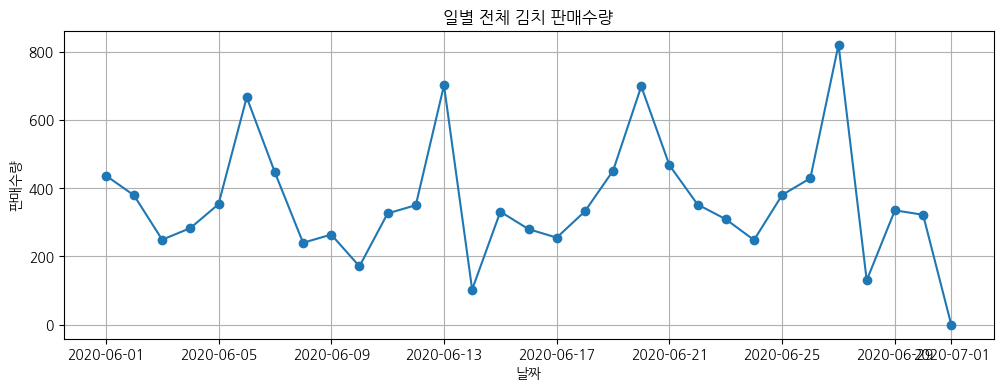

In [17]:
# 3. 날짜별 전체 판매량 트렌드 (시계열 기초 확인)
daily_sales = df.groupby('날짜')['판매수량'].sum().reset_index()

plt.figure(figsize=(12, 4))
plt.plot(daily_sales['날짜'], daily_sales['판매수량'], marker='o')
plt.title('일별 전체 김치 판매수량')
plt.xlabel('날짜')
plt.ylabel('판매수량')
plt.grid(True)
plt.show()

In [18]:
# 4. 매장별 판매 트렌드 편차 확인 (상위/하위 매장)
top_stores = df.groupby('매장명')['판매수량'].sum().sort_values(ascending=False).head(10)
bottom_stores = df.groupby('매장명')['판매수량'].sum().sort_values(ascending=True).head(10)

print("판매량 상위 매장:")
print(top_stores)

print("\n판매량 하위 매장:")
print(bottom_stores)

판매량 상위 매장:
매장명
[현]이마트가양H      447
[현]이마트청주H      412
[현]이마트월배H      388
[현]이마트파주운정H    375
[현]이마트산본H      371
[현]이마트여수H      347
[현]이마트미아H      302
[현]이마트월계H      287
[현]이마트가든5H     277
[현]이마트순천H      276
Name: 판매수량, dtype: int64

판매량 하위 매장:
매장명
[현]이마트시지H      0
[현]이마트동광주H     0
[현]이마트학성H      0
[현]이마트상무H      0
[현]이마트서부산H     0
[현]이마트신월H      6
[현]이마트인천공항H    7
[현]이마트진접H      7
[현]이마트사상H      8
[현]이마트남원H      9
Name: 판매수량, dtype: int64


<Axes: title={'center': 'Zone 구성 유무에 따른 평균 판매량'}, xlabel='Zone 여부'>

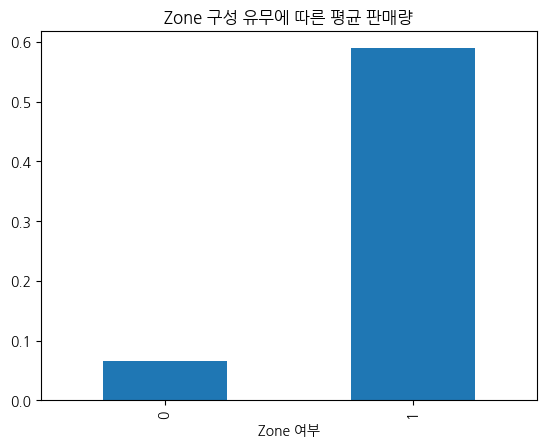

In [19]:
# 5. Zone 구성 유무 / 판촉사원 투입 / 목표수량의 영향도 시각화

# (1) Zone 유무에 따른 평균 판매량 비교

zone_sales = df.groupby('Zone 여부')['판매수량'].mean()
zone_sales.plot(kind='bar', title='Zone 구성 유무에 따른 평균 판매량')

Text(0.5, 1.0, '홍보일수와 판매수량 관계')

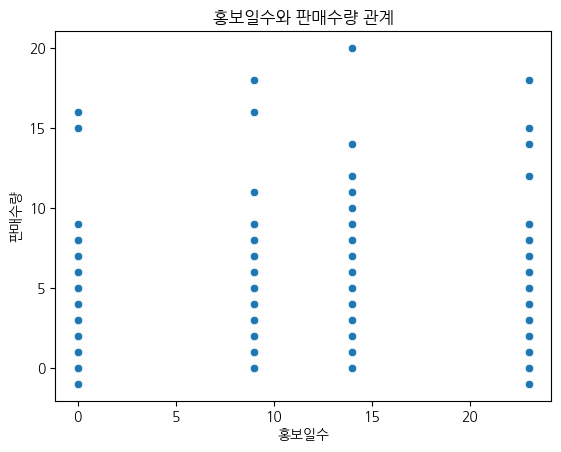

In [20]:
# (2) 홍보일수에 따른 판매량 관계

import seaborn as sns
sns.scatterplot(data=df, x='홍보일수', y='판매수량')
plt.title('홍보일수와 판매수량 관계')

Text(0.5, 1.0, '목표수량 vs 실제 판매수량')

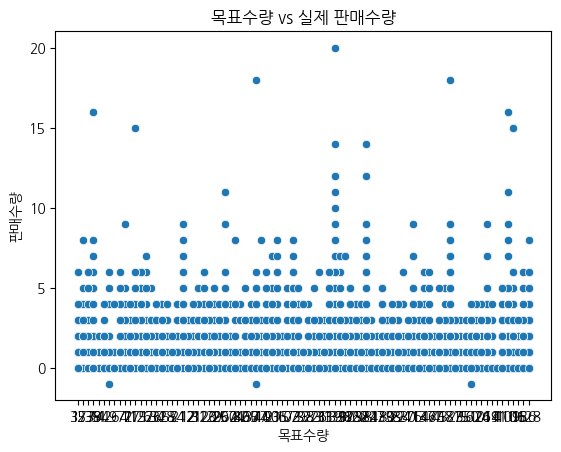

In [21]:
# (3) 목표수량과 실제 판매량 비교

sns.scatterplot(data=df, x='목표수량', y='판매수량')
plt.title('목표수량 vs 실제 판매수량')

<Axes: title={'center': '요일별 총 판매수량'}, xlabel='요일'>

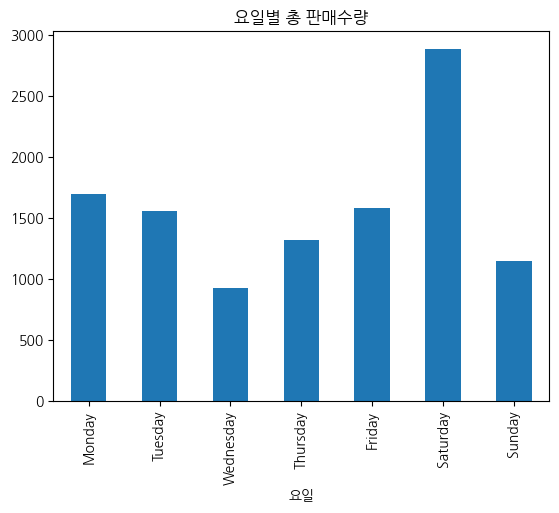

In [22]:
# 6. 요일별 패턴 확인 (시계열 예측에 중요)

df['요일'] = df['날짜'].dt.day_name()
weekday_sales = df.groupby('요일')['판매수량'].sum()
weekday_sales = weekday_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekday_sales.plot(kind='bar', title='요일별 총 판매수량')

<Axes: title={'center': '파트별 총 판매수량'}, ylabel='파트'>

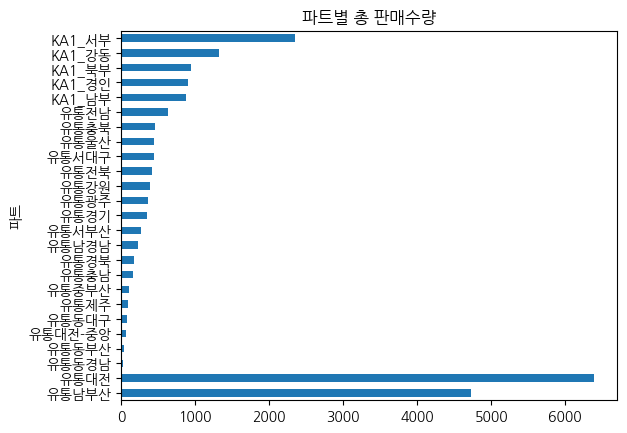

In [23]:
# 7. 파트 / 권역 / 지점 단위 분석 (지역별 영향)

region_sales = df.groupby('권역')['판매수량'].sum().sort_values()
region_sales.plot(kind='barh', title='권역별 총 판매수량')

part_sales = df.groupby('파트')['판매수량'].sum().sort_values()
part_sales.plot(kind='barh', title='파트별 총 판매수량')

# **-> ['날짜', '품목', '판매가격', '권역', '지점', '파트', '매장명', 'Zone여부', '홍보일수', '목표수량'] 사용**

# **3. 전처리 및 피처 엔지니어링**

In [11]:
# 1. 날짜 처리
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.sort_values(by='날짜')

# 2. 파생 변수 생성
df['요일'] = df['날짜'].dt.dayofweek             # 월=0, 일=6
df['주말여부'] = df['요일'].apply(lambda x: 1 if x >= 5 else 0)

# 3. 범주형 변수 인코딩
cat_cols = ['품목', '권역', '지점', '파트', '매장명']
for col in cat_cols:
    le = LabelEncoder()
    df[col + '_코드'] = le.fit_transform(df[col])

In [12]:
# 4. 숫자형 변수 전처리
df['판매가격'] = pd.to_numeric(df['판매가격'].astype(str).str.replace(',', ''), errors='coerce')
df['목표수량'] = pd.to_numeric(df['목표수량'].astype(str).str.replace(',', ''), errors='coerce')
df['판매금액'] = pd.to_numeric(df['판매금액'].astype(str).str.replace(',', '').replace('-', '0'), errors='coerce')

In [13]:
# 5. 사용 변수 설정
features = [
    '판매가격', '홍보일수', '목표수량', 'Zone 여부',
    '요일', '주말여부',
    '품목_코드', '권역_코드', '지점_코드', '파트_코드', '매장명_코드'
]
target = '판매금액'

In [14]:
# 6. Train / Test 분할 (날짜 기준)
train = df[df['날짜'] <= df['날짜'].min() + pd.Timedelta(days=20)]  # 1~21일
test = df[df['날짜'] > df['날짜'].min() + pd.Timedelta(days=20)]   # 22~30일

X_train = train[features].copy()
y_train = train[target].copy()
X_test = test[features].copy()
y_test = test[target].copy()

In [15]:
# 7. 결측치 제거
train_mask = X_train.notnull().all(axis=1) & y_train.notnull()
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = X_test.notnull().all(axis=1) & y_test.notnull()
X_test = X_test[test_mask]
y_test = y_test[test_mask]

5. Modeling

In [16]:
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
# 8. 예측 + 성능 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [19]:
print(f"📊 MAE: {mae:.2f}")
print(f"📊 RMSE: {rmse:.2f}")

📊 MAE: 7289.07
📊 RMSE: 12038.97


엔지니어링 후 시각화

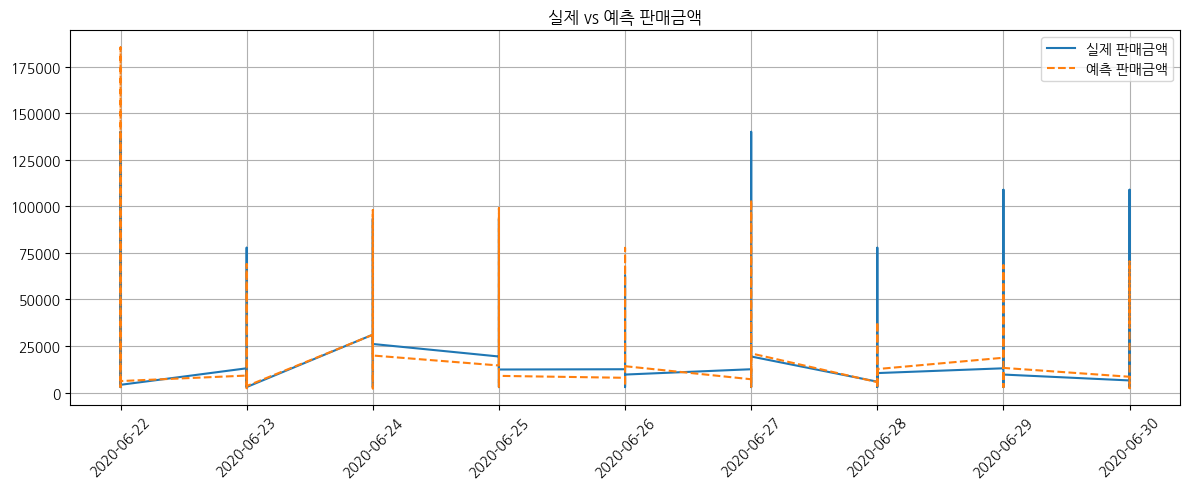

In [20]:
# 12. 시각화 - 실제 vs 예측
plt.figure(figsize=(12, 5))
plt.plot(test.loc[test_mask, '날짜'], y_test.values, label='실제 판매금액')
plt.plot(test.loc[test_mask, '날짜'], y_pred, label='예측 판매금액', linestyle='--')
plt.title('실제 vs 예측 판매금액')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

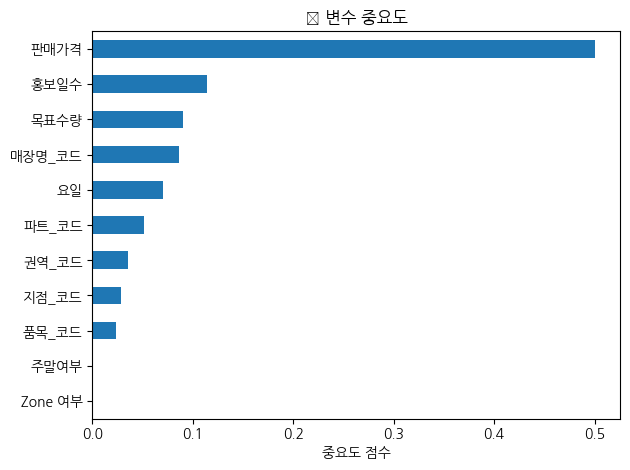

In [21]:
# 13. 변수 중요도 시각화
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', title='📌 변수 중요도')
plt.xlabel('중요도 점수')
plt.tight_layout()
plt.show()

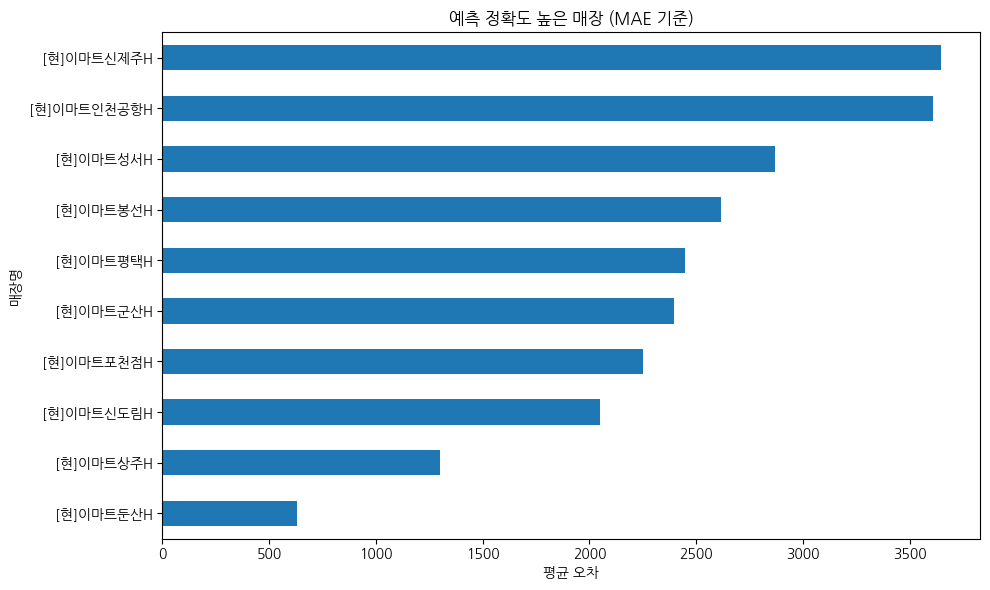

In [23]:
# 14. 매장별 예측 오차 분석
# 결측치 제거된 test 데이터에 대해서만 예측값 붙이기
test_valid = test.loc[test_mask].copy()
test_valid['예측'] = y_pred
test_valid['오차'] = test_valid['예측'] - y_test.values  # 또는 test_valid['판매금액']

# 매장별 MAE 계산
store_mae = test_valid.groupby('매장명')['오차'].apply(lambda x: np.mean(np.abs(x)))

# 시각화
plt.figure(figsize=(10, 6))
store_mae.sort_values().head(10).plot(kind='barh', title='예측 정확도 높은 매장 (MAE 기준)')
plt.xlabel('평균 오차')
plt.tight_layout()
plt.show()